## EAS 503 Homework 2 Submission
Name - _Boobalaganesh Ezhilan_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw2.ipynb**


### Submission Details 
* **Due Date** - October 16, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Inheritance and Encapsulation (15 points)

Consider a class of credit card accounts. A credit card account can have 2 types of credit cards:
1. Primary card  
2. Supplement card (Sup-card)

Consider the following attributes of the cards:

- A primary account is the main account to which multiple sup-cards are linked. 

- The primary credit card holder will be responsible for the bill payments for all the transactions on the primary card itself as well as all its supplimentary cards. 

- There are two types of credit limits:

    1. Individual card limit (limiting the expenditure per card)

    2. Account limit (limiting the total expenditure on primiary and the related sup-cards)

$$Account\ Limit >= Individual\ Card\ Limit$$

- There are two types of expenditure (or balances):

    1. Individual card expenditure (different for each card irrespective of primary or otherwise)

    2. Account expenditure (total spending on primary and all the related sup-cards)

$$Account\ expenditure = \Sigma(Individual\ card\ expenditure )$$ 


- Each sup-card has the same account limit as the primary credit card in that account. The account limit is the max of all card limts in that account. 

- Any transaction over the permitted limits must be denied i.e. transactions cannot lead to account expenditures being more than account limits. Also, transactions cannot lead to individual card expenditures being more than individual card limit.

For this problem, design a class `PrimaryCard` with all the account details and primary credit card details included in the class. Construct a sub-class of supplementary card holder, `SupplementaryCard`, linked to a primary credit card account. Ensure that the sensitive details of all the accounts (credit card numbers, balance, account limit etc.) must saved and accessed securely. 

Use the `Account_details.txt` file to access the account details for 15 credit cards. The transaction details for the month of october are provided in `transaction.txt` file. Design an algorithm to update the account balance on all the accounts and plot the final account balance on each day for the month of october.

Example:
Suppose you have an account with 5 cards in it (1 primary and 4 sup-cards). 

Primary card limit= $100

Each sup-card limit=$30

Restrictions:

- Account limit is $100 (max of 100 and 30)

- Primary card cannot spend more than $100

- All cards together cannot spend more than $100

- Any sup-card cannot spend more than $30

In [1]:
#Creating the primary class
class Primarycard:
    #Dictionary to store the primary card limit
    primaryCardLimitDict = {}
    def __init__(self,cust_id,card_no,acc_no,card_limit,current_bal):
        self._cust_id=cust_id
        self._card_no=card_no
        self._acc_no=acc_no
        self._card_limit=card_limit
        self._current_bal=current_bal
        
    #Creating the getter methods for private variables    
    def cust_id(self):
        return self._cust_id
    
    def card_no(self):
        return self._card_no
    
    def acc_no(self):
        return self._acc_no
    
    def card_limit(self):
        return self._card_limit
    
    def getCurrbalance(self):
        return self._current_bal
    
        
    #Updating the primary card limit transaction in the dictionary   
    def current_balance(self,transactionamount):
                self._current_bal=self._current_bal+transactionamount
                if not self._card_no in Primarycard.primaryCardLimitDict.keys(): 
                    Primarycard.primaryCardLimitDict[self._card_no] = self._current_bal
                else:
                    Primarycard.primaryCardLimitDict[self._card_no] = self._current_bal + Primarycard.primaryCardLimitDict[self._card_no]
     
    # Adding the account balance for corresponding account number
    def summingAllAccountno(self,total_bal):
        if not self._acc_no in total_bal.keys():
            total_bal[self._acc_no] = self._current_bal
            return total_bal[self._acc_no]
        else:   
            total_bal[self._acc_no] = total_bal[self._acc_no]+self._current_bal
            return total_bal[self._acc_no]
    
    #Updating the total account balance in dictionary
    def accountBalance(self,trans_amount,total_bal):
        total_bal[self._acc_no] = total_bal[self._acc_no]+trans_amount
        print(total_bal)
        return total_bal[self._acc_no]
    
    #Checkcing whether the transaction is valid or not
    def transaction_status(self,trans_amount,acc_no,account_limit):
        if self._current_bal+trans_amount>self._card_limit:
            print("The card Limit Exceeded")
            return False
        elif total_bal[acc_no]+trans_amount>account_limit:
            print("The account Limit Exceeded")
            print(self._card_limit)
            return False
        else: 
            print("Transaction Successful")
            return True
    

#Creating the sub-class for the primary class primarycard
class SupplementaryCard(Primarycard):
    supplementaryCardLimitDict = {}
    def __init__(self,cust_id,card_no,acc_no,card_limit,current_bal):
        super().__init__(cust_id,card_no,acc_no,card_limit,current_bal)
        
    #Updating the primary card limit transaction in the dictionary  
    def current_balance(self,transaction_amt):
        self._current_bal=self._current_bal+transaction_amt
        if not self._card_no in SupplementaryCard.supplementaryCardLimitDict.keys(): 
            SupplementaryCard.supplementaryCardLimitDict[self._card_no] = self._current_bal
        else:
            SupplementaryCard.supplementaryCardLimitDict[self._card_no] = self._current_bal+SupplementaryCard.supplementaryCardLimitDict[self._card_no]
            return self._current_bal    

#Initializing the dict values
import pandas as pd 
dailyBalanceDict ={}
total_bal = {}
customerIdToAccountDict = {}

# Importing the .txt file as the data frame
accountDetails=pd.read_csv("Account_details.txt",delimiter="\t")
transactionsDetail=pd.read_csv("transaction.txt",delimiter="\t")


#Calling the function for summing all the account Number
for row in accountDetails.itertuples(index = False,name = 'Pandas'):
    primaryObj3 = Primarycard(row[0],row[1],row[2],row[4],row[5])
    primaryObj3.summingAllAccountno(total_bal)  

#Creating mapper class from the customer Id to account number
for row in accountDetails.itertuples(index=True, name='Pandas'):
    accountNumber = row[3]
    customerIdToAccountDict[row[1]] = accountNumber

#Calling the function for summing all the account Number
total_bal = {}
for row in accountDetails.itertuples(index = False,name = 'Pandas'):
    primaryObj3 = Primarycard(row[0],row[1],row[2],row[4],row[5])
    primaryObj3.summingAllAccountno(total_bal) 
    
#creatoin the dictionary with account numbers as keys
for accountId in total_bal:
    dailyBalanceDict[accountId] = {}    
    

#iterating the loop for each transaction    
for i in range(0,len(transactionsDetail)):
    cust_id=transactionsDetail.Customer_ID[i]
    transactionAmount=transactionsDetail.Transaction_amount[i]
    date = transactionsDetail.Date[i]
    
    #checking the customer Id and sending the corresponding information about the account to primary account
    checkPrimaryOrSecondary=accountDetails[accountDetails['Customer_ID'].isin([cust_id])]['Primary_or_Sup_card_indicator']
    cust_id=accountDetails[accountDetails['Customer_ID'].isin([cust_id])]['Customer_ID'].item()
    card_no=accountDetails[accountDetails['Customer_ID'].isin([cust_id])]['Card_number'].item()
    acc_no=accountDetails[accountDetails['Customer_ID'].isin([cust_id])]['Account_Number'].item()
    card_limit=accountDetails[accountDetails['Customer_ID'].isin([cust_id])]['Card_Limit'].item()
    account_limit=max(accountDetails[accountDetails['Account_Number'].isin([acc_no])]['Card_Limit'])
    curr_bal=accountDetails[accountDetails['Customer_ID'].isin([cust_id])]['Current_Balance_within_card'].item()
    
    #Condition to check whether the transaction belongs to primary or supplementary card
    if checkPrimaryOrSecondary.item()=='S':
        secondaryObj=SupplementaryCard(cust_id,card_no,acc_no,card_limit,curr_bal)
        primaryObj1=Primarycard(cust_id,card_no,acc_no,card_limit,curr_bal)
        if primaryObj1.transaction_status(transactionAmount,acc_no,account_limit):
            secondaryObj.current_balance(transactionAmount)
            primaryObj1.accountBalance(transactionAmount,total_bal)
            dailyBalanceDict[customerIdToAccountDict[cust_id]][date] =  total_bal[acc_no]
    elif checkPrimaryOrSecondary.item()=='P':
        primaryObj2=Primarycard(cust_id,card_no,acc_no,card_limit,curr_bal)
        if primaryObj2.transaction_status(transactionAmount,acc_no,account_limit):
            primaryObj2.current_balance(transactionAmount)
            primaryObj2.accountBalance(transactionAmount,total_bal)
            print(total_bal[acc_no])
            dailyBalanceDict[customerIdToAccountDict[cust_id]][date] =  total_bal[acc_no]

Transaction Successful
{4652: 6924, 5232: 8730, 5216: 1682, 4480: 5601.3, 5058: 9772, 4952: 926}
Transaction Successful
{4652: 6948.6, 5232: 8730, 5216: 1682, 4480: 5601.3, 5058: 9772, 4952: 926}
Transaction Successful
{4652: 6957.900000000001, 5232: 8730, 5216: 1682, 4480: 5601.3, 5058: 9772, 4952: 926}
Transaction Successful
{4652: 6957.900000000001, 5232: 8730, 5216: 1682, 4480: 5601.3, 5058: 9817.9, 4952: 926}
9817.9
Transaction Successful
{4652: 6957.900000000001, 5232: 8730, 5216: 1682, 4480: 5601.3, 5058: 9817.9, 4952: 988.0}
Transaction Successful
{4652: 6965.6, 5232: 8730, 5216: 1682, 4480: 5601.3, 5058: 9817.9, 4952: 988.0}
6965.6
The account Limit Exceeded
1000
Transaction Successful
{4652: 7020.1, 5232: 8730, 5216: 1682, 4480: 5601.3, 5058: 9817.9, 4952: 988.0}
Transaction Successful
{4652: 7020.1, 5232: 8730, 5216: 1682, 4480: 5619.5, 5058: 9817.9, 4952: 988.0}
Transaction Successful
{4652: 7076.5, 5232: 8730, 5216: 1682, 4480: 5619.5, 5058: 9817.9, 4952: 988.0}
Transactio

Transaction Successful
{4652: 8590.7, 5232: 9040.300000000001, 5216: 1986.9999999999998, 4480: 6119.299999999999, 5058: 14734.2, 4952: 995.6}
8590.7
Transaction Successful
{4652: 8590.7, 5232: 9056.900000000001, 5216: 1986.9999999999998, 4480: 6119.299999999999, 5058: 14734.2, 4952: 995.6}
Transaction Successful
{4652: 8590.7, 5232: 9056.900000000001, 5216: 1986.9999999999998, 4480: 6119.299999999999, 5058: 14762.5, 4952: 995.6}
Transaction Successful
{4652: 8590.7, 5232: 9056.900000000001, 5216: 1986.9999999999998, 4480: 6215.4, 5058: 14762.5, 4952: 995.6}
Transaction Successful
{4652: 8590.7, 5232: 9056.900000000001, 5216: 2019.1999999999998, 4480: 6215.4, 5058: 14762.5, 4952: 995.6}
2019.1999999999998
Transaction Successful
{4652: 8590.7, 5232: 9112.600000000002, 5216: 2019.1999999999998, 4480: 6215.4, 5058: 14762.5, 4952: 995.6}
9112.600000000002
Transaction Successful
{4652: 8590.7, 5232: 9112.600000000002, 5216: 2019.1999999999998, 4480: 6215.4, 5058: 14855.8, 4952: 995.6}
Transa

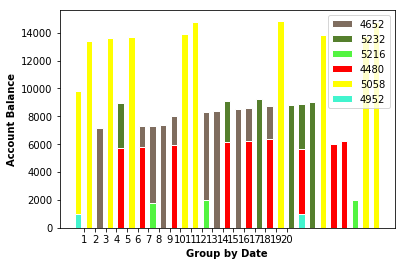

In [3]:
import numpy as np
import matplotlib.pyplot as plt
var1 = []
balanceEachDay = []
dateList1 = []
var1.append(dailyBalanceDict.keys())
for account in dailyBalanceDict:
    balanceEachDay.append(dailyBalanceDict[account].values())
    dateList1.append(dailyBalanceDict[account].keys())
barWidth = 0.6

dateList2 = []
for i in range(1,30):
    dateList2.append(i)
plt.bar(sorted(dateList1[0]), balanceEachDay[0], color='#7f6d5f', width=barWidth, edgecolor='white', label='4652')
plt.bar(sorted(dateList1[1]), balanceEachDay[1], color='#557f2d', width=barWidth, edgecolor='white', label='5232')
plt.bar(sorted(dateList1[2]), balanceEachDay[2], color='#53f441', width=barWidth, edgecolor='white', label='5216')
plt.bar(sorted(dateList1[3]), balanceEachDay[3], color='#FF0000', width=barWidth, edgecolor='white', label='4480')
plt.bar(sorted(dateList1[4]), balanceEachDay[4], color='#FFFF00', width=barWidth, edgecolor='white', label='5058')
plt.bar(sorted(dateList1[5]), balanceEachDay[5], color='#42f4ce', width=barWidth, edgecolor='white', label='4952')

plt.xlabel('Group by Date', fontweight='bold')
plt.ylabel('Account Balance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(balanceEachDay[0]))], dateList2)

plt.legend()
plt.show()

### Problem 2 - Polynomials (15 Points)

Consider a general form of an nth order polynomial. You are asked to implement a polynomial of arbitrary degree using classes in python. For instance consider the polynomial:
$$7x^4 + 2x^2 + 5 = 0$$

For this implements the following steps:
1. Implement a class that represents a single term. 
2. Implement a class for the entire polynomial. 
3. Implement an operator ($*$) to multiply two single terms, a term and a polynomial, and two polynomials. (__Note__: _you can overload the $*$ operator in Python by defining a method called ``__mul__(self,other):`` and make it mutiply the ``self`` object with the ``other`` object)
4. Implement an operator(s) that enables addition of a term and a polynomial and/or two polynomials. (__Note__: _you can overload the  $+$  operator in Python by defining a method called ``__add__(self,other)``: and make it add the self object with the other object)
5. Implement the following two internal methods within ``Polynomial`` class:
    - ``order()``, which returns the order of the polynomial (as an ``int``).
    - ``solve()``, which returns solutions for the polynomial (a ``list`` of roots). Only do it for quadratic polynomials, and raise an exception for higher order polynomials.
6. Implement an external function that plots the polynomial on a domain of [-10,10] (you will have to use _matplotlib_ rountines for this).
7. Include a destructor function for the polynomial class.

Use the above class definitions and operators to generate the solutions (wherever needed) for the following set of polynomials:

1. $x^5 -3x^3 +9x^2+5x+6=0$
2. $x^3 -8x +5=0$
3. $x^2+9x+7=0$
3. Consider the following three polynomials: $f(x)=3x-1,$ $g(x)=x^2-2$ and $p(x)=8x^2 +4$. Plot the function $f(x)-g(x)*p(x)=0$ by taking $f,g,p$ as input functions. For this, use the ``__mul__(self,other)`` and ``__add__(self,other)`` methods.

Note: Here you are basically asked to define the basis for the vector space of real polynomials and define all the vector operations.

The Given Order of the Equation is  5
The Given Equation is not Quadratic
The Given Solution of the Equation is None


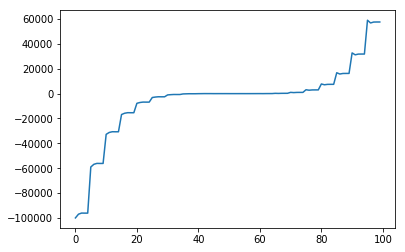

The Given Order of the Equation is  3
The Given Equation is not Quadratic
The Given Solution of the Equation is None


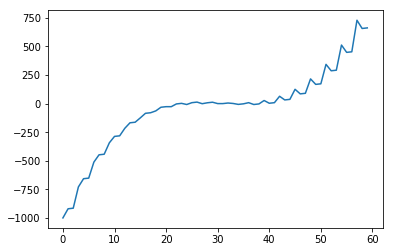

The Given Order of the Equation is  2
The Given Solution of the Equation is [-8.14005494 -0.85994506]


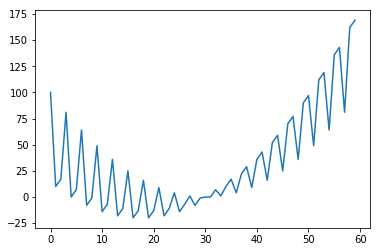

[(8, 4), (-12, 2), (-8, 0)]
The solution for the polynomial equation is [(3, 1), (8, 4), (-1, 0), (-12, 2)]


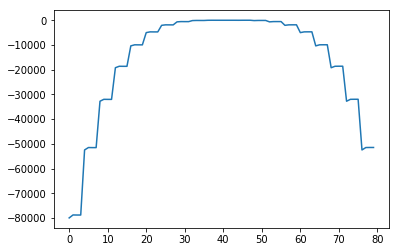

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class polyTerm:
    def __init__(self,coefficients,power):        
        self._power=power
        self._coefficients=coefficients
        
    # method to return private variable
    def power(self):
        return self._power
    
    # method to return private variable
    def coeff(self):
        return self._coefficients
        

class Polynomial:

    def __init__(self,terms):
        self._terms=terms
        
    # method to return private variable    
    def get_polyTerm(self):
        return self._terms 
    
    #destructor function to clear the values 
    def __def__(self):
        self._terms=terms
        
     #Overridding the + operator            
    def __add__(self,other):
        polyList = []
        minimumLength = min(len(self.get_polyTerm()), len(other.get_polyTerm()))
        for i in range(minimumLength):
            if self.get_polyTerm()[i].power() == other.get_polyTerm()[i].power():
                sumCoeff = self.get_polyTerm()[i].coeff() + other.get_polyTerm()[i].coeff()
                if sumCoeff != 0:
                    polyList.append((sumCoeff, self.get_polyTerm()[i].power())) 
            if self.get_polyTerm()[i].power() != other.get_polyTerm()[i].power():
                polyList.append((self.get_polyTerm()[i].coeff(),self.get_polyTerm()[i].power()))
                polyList.append((other.get_polyTerm()[i].coeff(),other.get_polyTerm()[i].power()))
        return polyList  
    
    #Overridding the * operator
    def __mul__(self,other):
        coefficientList = []
        powerList=[]
        result= []
        polyList =[]
        polyLength1 = len(self.get_polyTerm())
        polyLength2 = len(other.get_polyTerm())
        sumLength = polyLength1 + polyLength1-1
        for i in range(sumLength):
            coefficientList.append(0)
            powerList.append(0)    
        for i in range(polyLength1):
            for j in range(polyLength2):
                coefficientList[i+j] += self.get_polyTerm()[i].coeff()*other.get_polyTerm()[j].coeff()        
                powerList[i+j] = self.get_polyTerm()[i].power()+other.get_polyTerm()[j].power()
        for i in range(sumLength): 
            result.append((coefficientList[i],powerList[i]))
            polyList.append(polyTerm(coefficientList[i],powerList[i]))
        print(result)
        # returning as the polynomial function for three equation calculation
        return Polynomial(polyList)
    
    
     #Method to solve the Quadratic equation and through exception if there is non Quadratic
    def solve(self):  
            resultList = []
            #try catch block will raise error ValueError if there is any non Quadratic equation arises
            try:
                if self.order()>2:
                    raise ValueError("The Given Equation is not Quadratic")
                else:
                    for i in range(0,len(self.get_polyTerm())):
                        resultList.append(self.get_polyTerm()[i].coeff())
                        solution  = np.roots(resultList)
                    return solution
            except ValueError as error:
                print(error)
                
    #Plotting the Polynomial fuctions
    def polyFit(self):
        polyList = []
        polyLength1 = len(self.get_polyTerm())
        for j in range(-10, 10):
            coeffVal = 0
            for i in range(0, polyLength1):
                coeffVal = coeffVal + self.get_polyTerm()[i].coeff() * (j**self.get_polyTerm()[i].power())
                polyList.append(coeffVal)
        plt.plot(polyList)

    
    #Function returns the order of the equation
    def order(self):
        orderNumber=0
        for i in range(0,len(self.get_polyTerm())):
            if self._terms[i].power()>orderNumber:
                orderNumber=self._terms[i].power()
        return orderNumber
                        
#The Solution for the First Polynomial equation
polynomial1=Polynomial([polyTerm(1,5),polyTerm(-3,3),polyTerm(9,2),polyTerm(5,1),polyTerm(6,0)])
print('The Given Order of the Equation is ',polynomial1.order())
print('The Given Solution of the Equation is',polynomial1.solve())
polynomial1.polyFit()
plt.show()

#The Solution for the Second Polynomial equation
polynomial2=Polynomial([polyTerm(1,3),polyTerm(-8,1),polyTerm(5,0)])
print('The Given Order of the Equation is ',polynomial2.order())
print('The Given Solution of the Equation is',polynomial2.solve())
polynomial2.polyFit()
plt.show()

#The Solution for the Third Polynomial equation
polynomial3=Polynomial([polyTerm(1,2),polyTerm(9,1),polyTerm(7,0)])
print('The Given Order of the Equation is ',polynomial3.order())
print('The Given Solution of the Equation is',polynomial3.solve())
polynomial3.polyFit()
plt.show()


#Three polynomialfunction and the corresponding polynomial plot
F = Polynomial([polyTerm(3,1),polyTerm(-1,0)])
G =  Polynomial([polyTerm(1,2),polyTerm(-2,0)])
P = Polynomial([polyTerm(8,2),polyTerm(4,0)])


GP = Polynomial([polyTerm(-8,4),polyTerm(12,2),polyTerm(8,0)])

#The polynomial equation
polyEquation = F+(G*P)
print('The solution for the polynomial equation is',polyEquation)


plot = Polynomial([polyTerm(-8,4),polyTerm(12,2),polyTerm(3,1),polyTerm(-1,0)])
plot.polyFit()
plt.show()

### Problem 3 - Random Walk (10 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a step of random length, say `c`, in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (c,0), (-c,0), (0,c) or (0,-c) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``getLength()`` that determines the length for the next step (one out of six possible lengths: 0,1,2,3,4,5). To determine the length, sample a random value from the set {1,2,3,4,5,6} using `np.random.randint(0,N)` and assign each outcome to a step length.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-20,-20), (-20,20), (20,20), (20,-20). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).

out of perimeter in first axis
No of steps Taken: 91
20 4
[(0, 0), (0, -5), (0, -3), (3, -3), (3, -1), (3, -5), (3, -5), (3, -6), (-1, -6), (-1, -6), (-1, -1), (2, -1), (-3, -1), (-2, -1), (-2, -1), (-2, 2), (-2, 1), (-2, 0), (-2, -1), (1, -1), (1, -5), (-2, -5), (-2, -5), (2, -5), (-1, -5), (-1, 0), (-1, 1), (-1, -2), (0, -2), (-1, -2), (3, -2), (3, 1), (3, -3), (3, -1), (3, -3), (-2, -3), (-2, -5), (-2, -5), (2, -5), (2, -5), (3, -5), (2, -5), (4, -5), (4, -6), (4, -6), (8, -6), (8, -7), (8, -10), (8, -6), (4, -6), (4, -2), (4, -2), (4, -2), (4, 2), (9, 2), (9, 2), (5, 2), (7, 2), (11, 2), (11, 1), (11, -3), (12, -3), (12, -8), (8, -8), (10, -8), (10, -4), (14, -4), (14, -7), (11, -7), (8, -7), (6, -7), (6, -7), (6, -7), (6, -6), (10, -6), (8, -6), (8, -5), (3, -5), (2, -5), (7, -5), (10, -5), (10, -1), (10, -5), (10, -5), (15, -5), (18, -5), (18, -1), (18, 1), (18, 1), (18, 4), (20, 4)]
out of perimeter in first axis
No of steps Taken: 25
5 20
[(0, 0), (0, 2), (0, 1), (0, -2), (0, -

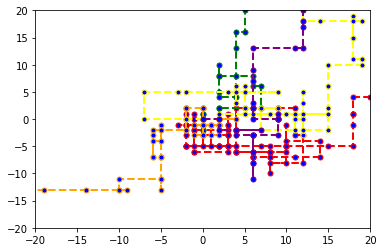

Average Number of Steps : 50


In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Initializing the class
class Walker:
    def __init__(self,currentPosition,pathTaken=[]):
        self.currentPosition = currentPosition
        self.pathTaken  = pathTaken
    #Method to get random direction    
    def getDirection(self):
        getDirectionWalker = np.random.randint(0,4)
        directionDict = {0:(1,0),1:(-1,0),2:(0,1),3:(0,-1)}
        self.currentDirection = directionDict[getDirectionWalker]
        
    #Method to get magnitude of the direction     
    def getLength(self):
        getLengthWalker = np.random.randint(0,6)
        self.stepLength = getLengthWalker
        
    #Method to calculate the total path travelled by the walker      
    def walk(self):
        latestPath = tuple([self.stepLength*x for x in self.currentDirection])
        self.pathTaken.append(latestPath)
        
def randomWalk(simulationTimes):
    pathTaken = []
    tupleList = [(0,0)]
    currentPosition = (0,0)
    pathTaken.append(currentPosition)
    sample = Walker(currentPosition,pathTaken);
    plotColor = {0:'red',1:'green',2:'orange',3:'yellow',4:'purple'}
    for steps in range (0,1000):
        sample.getDirection()
        sample.getLength()
        sample.walk()
        
        xx,yy = CalculatePerimeter(sample.pathTaken)
        tupleList.append((xx,yy))
        if(xx >= 20 or yy>= 20 ):
            print('out of perimeter in first axis')
            print('No of steps Taken:' ,len(sample.pathTaken))
            print(xx,yy)
            break
        if(xx <= -20 or yy <= -20 ):
            print('out of perimeter in first axis')
            print('No of steps Taken:' ,len(sample.pathTaken))
            print(xx,yy)
            break
        if( xx >= 20 and yy >= 20):
            print('out of perimeter in first axis')
            print('No of steps Taken:' ,len(sample.pathTaken))
            print(xx,yy)
            break
        if(xx <= -20 and yy <= -20):
            print('out of perimeter in second axis')
            print('No of steps Taken:' ,len(sample.pathTaken))
            print(xx,yy)
            break
        if(xx <= -20 and yy >= 20):
            print('out of perimeter in Third axis')
            print('No of steps Taken:', len(sample.pathTaken))
            print(xx,yy)
            break
        if(xx >= 20 and yy <= -20):
            print('out of perimeter in fourth axis')
            print('No of steps Taken:',len(sample.pathTaken))
            print(xx,yy)
            break
    data = np.array(sample.pathTaken)
    x,y = zip(*tupleList)
    plt.plot(x, y, color=plotColor[simulationTimes], linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='blue', markersize=5)
    plt.xlim((-20,20))
    plt.ylim((-20,20))
  
    print(tupleList)
    return len(sample.pathTaken)            

#Function to check whether the walker crossed the perimeter of the rectangle 
def CalculatePerimeter(pathTaken):
    areaFirstStep = sum([pairs[0] for pairs in pathTaken])
    areaSecondStep = sum([pairs[1] for pairs in pathTaken])
    return areaFirstStep,areaSecondStep

#Iterating the function to calculate avearge of number of paths taken to cross perimeter
def simulationFiveTimes():
    simulationList = []
    for simulationTimes in range(0,5):
        numberOfSteps = randomWalk(simulationTimes)
        simulationList.append(numberOfSteps)
    plt.show()    
    averageSteps =  sum(simulationList)/(len(simulationList))
    print('Average Number of Steps :' , int(averageSteps))
   
 
simulationFiveTimes()


### Problem 4 - Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from a _Kumaraswamy distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is Kumaraswamy distribution. Call this function ``inverseCDFKumaraswamy()``. Note that you are not allowed to use any routines from ``np.random`` package except ``np.random.uniform``here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\alpha$ and $\beta$.
3. Apply the ``inverseCDFKumaraswamy()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

The Probability Density Function (PDF) of the Kumaraswamy distribution is
$$f(x)=\alpha*\beta*x^{\alpha-1}*(1-x^\alpha)^{\beta-1}$$

The Cumulative Distribution Function (CDF) of the Kumaraswamy distribution is
$$F(x)= 1-(1-x^\alpha)^\beta$$

Using the above implementation, generate a sample of size 100 from a Kumaraswamy ($\alpha=2$, $\beta=5$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

The Mean of generated Sample is: 0.34568001724332736
The Variance of generated Sample is: 0.03128109250433744


C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


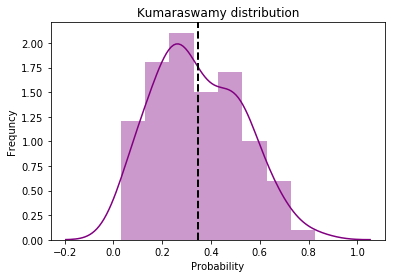

In [7]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

#The Method to find Inverse of the CDF
def inverseCDFKumaraswamy(randomNumber,alpha,beta):
    inverseCdfVal = math.pow(1-(math.pow((1-randomNumber),(1/beta))),(1/alpha))
    return inverseCdfVal  

#Initializing the Distribution Parameter
alpha = 2
beta = 5
inverseCDFList = []

#calculating 100 random variables
for sampleSize in range (1,101):
    generatedSample =np.random.uniform(0,1)
    inverseCDFList.append(inverseCDFKumaraswamy(generatedSample,alpha,beta))

#Calculating mean and Variance    
mean = (sum(inverseCDFList)/100)
variance = np.var(inverseCDFList)
print('The Mean of generated Sample is:' , mean)
print('The Variance of generated Sample is:' ,variance)

# The Histogram for th Generated sample Distribution
sns.distplot(inverseCDFList,color='purple')
plt.xlabel("Probability")
plt.ylabel("Frequncy")
plt.title("Kumaraswamy distribution")
plt.axvline(mean, color='k', linestyle='dashed', linewidth=2)